In [1]:
import cv2 as cv
import glob

from IPython.display import display, Markdown
import matplotlib.pyplot as plt

In [2]:
images_paths = glob.glob("images/*.jpg")
images_paths.sort()
print(images_paths)

images = [cv.imread(img) for img in images_paths]

['images/B21.jpg', 'images/B22.jpg', 'images/B23.jpg', 'images/B24.jpg', 'images/B25.jpg']


In [3]:
print(images)

[array([[[ 78, 138, 104],
        [ 86, 137, 100],
        [112, 143, 106],
        ...,
        [211, 195, 178],
        [210, 194, 177],
        [210, 194, 177]],

       [[ 86, 154, 123],
        [ 89, 149, 118],
        [107, 151, 115],
        ...,
        [209, 193, 176],
        [208, 192, 175],
        [208, 192, 175]],

       [[ 91, 180, 154],
        [ 94, 178, 150],
        [107, 177, 147],
        ...,
        [207, 191, 174],
        [207, 191, 174],
        [207, 191, 174]],

       ...,

       [[ 69,  72,  77],
        [ 52,  52,  58],
        [ 30,  28,  34],
        ...,
        [120, 115, 112],
        [119, 114, 111],
        [118, 113, 110]],

       [[ 12,  15,  23],
        [ 18,  21,  29],
        [ 26,  25,  34],
        ...,
        [117, 112, 109],
        [117, 112, 109],
        [116, 111, 108]],

       [[ 11,  17,  24],
        [  9,  12,  20],
        [ 15,  17,  25],
        ...,
        [115, 110, 107],
        [114, 109, 106],
        [115, 110, 107]

In [4]:
kp_images = []
sift = cv.SIFT_create()

kps = []
dess = []

for i, img in enumerate(images):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(gray,None)
    kps.append(kp)
    dess.append(des)
    kp_img = cv.drawKeypoints(img, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv.imwrite(f'sift_images/{i}.jpg',kp_img)

In [5]:
sift_images_paths = glob.glob("sift_images/*.jpg")
sift_images_paths.sort(reverse=True)
max_image_width = 300

markdown_content = '<div style="display: flex; flex-wrap: wrap;">'
for i, path in enumerate(sift_images_paths):
    img_html = f'<img src="{path}" alt="{i}" width="{max_image_width}px">'
    markdown_content += img_html
markdown_content += '</div>'
display(Markdown(markdown_content))

<div style="display: flex; flex-wrap: wrap;"><img src="sift_images/4.jpg" alt="0" width="300px"><img src="sift_images/3.jpg" alt="1" width="300px"><img src="sift_images/2.jpg" alt="2" width="300px"><img src="sift_images/1.jpg" alt="3" width="300px"><img src="sift_images/0.jpg" alt="4" width="300px"></div>

Number of matches: 563
Number of good matches: 108


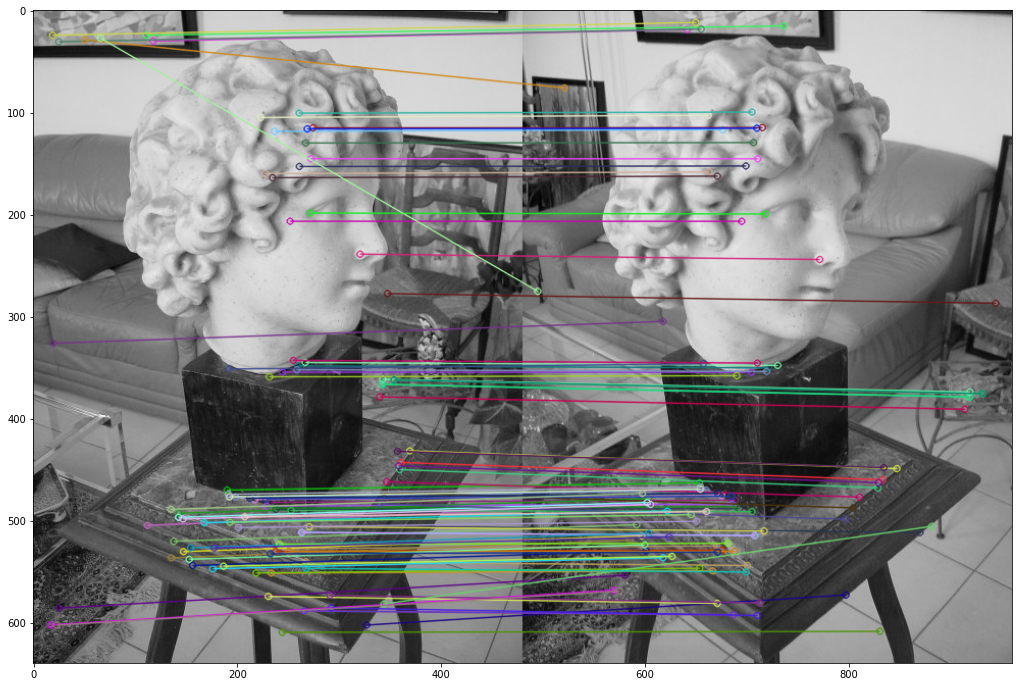

In [7]:
img1 = cv.imread('images/B21.jpg',cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.imread('images/B22.jpg',cv.IMREAD_GRAYSCALE) # trainImage

kp1 = kps[0]
kp2 = kps[1]
des1 = dess[0]
des2 = dess[1]

# Create a BFMatcher with cross-check enabled
bf = cv.BFMatcher(crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in ascending order of distance
matches = sorted(matches, key=lambda x: x.distance)

# Print the number of matches found
print(f"Number of matches: {len(matches)}")

# Apply a relaxed ratio test (adjust the threshold as needed)
good = []
ratio_threshold = 3.2  # You can experiment with this threshold value
for match in matches:
    if match.distance < ratio_threshold * matches[0].distance:
        good.append(match)

# Print the number of good matches
print(f"Number of good matches: {len(good)}")

# Draw the matches
img3 = cv.drawMatches(img1, kp1, img2, kp2, good[10:], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the result
plt.figure(figsize=(20, 12))
plt.imshow(img3)
plt.show()



# # FLANN parameters
# FLANN_INDEX_KDTREE = 1
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# search_params = dict(checks=50)   # or pass empty dictionary
# flann = cv.FlannBasedMatcher(index_params,search_params)
# matches = flann.knnMatch(des1,des2,k=2)
# # Need to draw only good matches, so create a mask
# matchesMask = [[0,0] for i in range(len(matches))]
# # ratio test as per Lowe's paper
# for i,(m,n) in enumerate(matches):
#     if m.distance < 0.7*n.distance:
#         matchesMask[i]=[1,0]
# draw_params = dict(matchColor = (0,255,0),
#                    singlePointColor = (255,0,0),
#                    matchesMask = matchesMask,
#                    flags = cv.DrawMatchesFlags_DEFAULT)
# img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)
# plt.figure(figsize=(20,12))
# plt.imshow(img3,)
# plt.show()